In [ ]:
import os
from glob import glob
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Performance Comparison for different similarity thresholds and similarity functions

In [ ]:
similarity_tuning_results = "hyperparam_tuning_results/result_20221125-172053.csv"
#Binary sim on full features
similarity_tuning_results2 = "hyperparam_tuning_results/result_20230125-233908.csv"
#Binary sim on multi features

In [ ]:
df = pd.read_csv(similarity_tuning_results, index_col=0)

In [ ]:
# the resulting accuracies in experiments were all close to 0.97 so it is very difficult to understand the difference
# that is why percentage difference from mean accuracy value is calculated for each threshold and function to compare the 
# performance
mean_validation_accuracy = df['Validation_Accuracy'].mean()
df['Mean_Difference'] = (df['Validation_Accuracy'] - mean_validation_accuracy)/mean_validation_accuracy * 100

In [ ]:
df = df.sort_values('Similarity_Threshold')

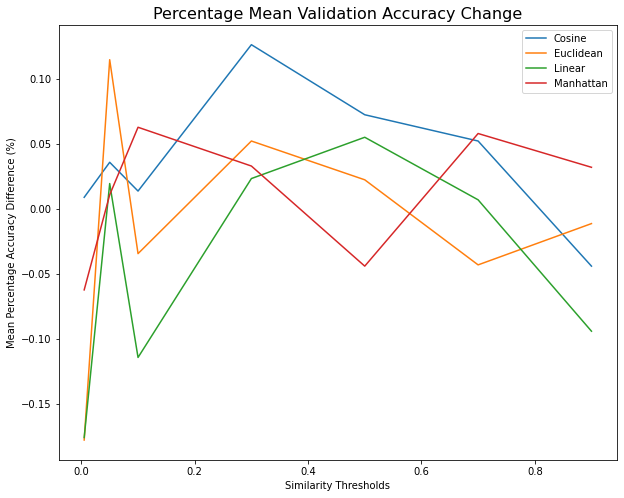

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(df[df['Similarity_Function']=='cosine']['Similarity_Threshold'].values, 
         df[df['Similarity_Function']=='cosine']['Mean_Difference'].values,
         label='Cosine')
plt.plot(df[df['Similarity_Function']=='euclidean']['Similarity_Threshold'].values, 
         df[df['Similarity_Function']=='euclidean']['Mean_Difference'].values,
         label='Euclidean')
plt.plot(df[df['Similarity_Function']=='linear']['Similarity_Threshold'].values, 
         df[df['Similarity_Function']=='linear']['Mean_Difference'].values,
         label='Linear')
plt.plot(df[df['Similarity_Function']=='manhattan']['Similarity_Threshold'].values, 
         df[df['Similarity_Function']=='manhattan']['Mean_Difference'].values,
         label='Manhattan')
plt.title("Percentage Mean Validation Accuracy Change", fontsize=16)
plt.xlabel("Similarity Thresholds")
plt.ylabel("Mean Percentage Accuracy Difference (%)")
plt.legend()
plt.show()

This is the similarity for the latest model using all features for binary

In [ ]:
df = pd.read_csv(similarity_tuning_results2, index_col=0)

In [ ]:
# the resulting accuracies in experiments were all close to 0.97 so it is very difficult to understand the difference
# that is why percentage difference from mean accuracy value is calculated for each threshold and function to compare the 
# performance
mean_validation_accuracy = df['Validation_Accuracy'].mean()
df['Mean_Difference'] = (df['Validation_Accuracy'] - mean_validation_accuracy)/mean_validation_accuracy * 100

In [ ]:
df = df.sort_values('Similarity_Threshold')

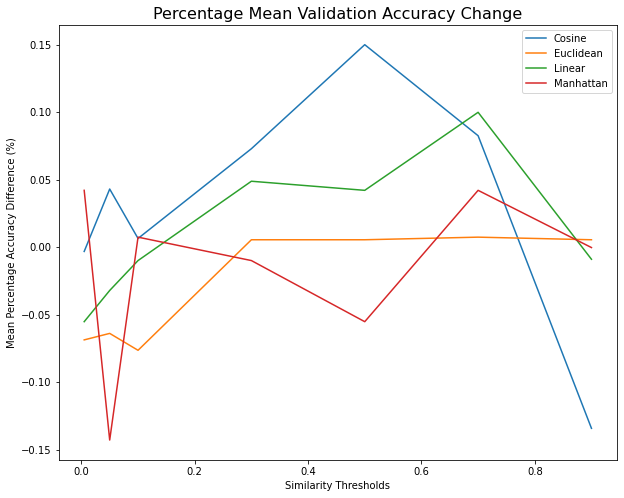

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(df[df['Similarity_Function']=='cosine']['Similarity_Threshold'].values, 
         df[df['Similarity_Function']=='cosine']['Mean_Difference'].values,
         label='Cosine')
plt.plot(df[df['Similarity_Function']=='euclidean']['Similarity_Threshold'].values, 
         df[df['Similarity_Function']=='euclidean']['Mean_Difference'].values,
         label='Euclidean')
plt.plot(df[df['Similarity_Function']=='linear']['Similarity_Threshold'].values, 
         df[df['Similarity_Function']=='linear']['Mean_Difference'].values,
         label='Linear')
plt.plot(df[df['Similarity_Function']=='manhattan']['Similarity_Threshold'].values, 
         df[df['Similarity_Function']=='manhattan']['Mean_Difference'].values,
         label='Manhattan')
plt.title("Percentage Mean Validation Accuracy Change", fontsize=16)
plt.xlabel("Similarity Thresholds")
plt.ylabel("Mean Percentage Accuracy Difference (%)")
plt.legend()
plt.show()

This is the similarity for the latest model using multi features for binary

# Printing Performance Metrics

In [ ]:
def print_metrics(file_path, title, classes):
    with open(file_path, 'rb') as new_file:
        metrics = pickle.load(new_file)
    print(title,"\n")
    print("{:40s}\t{:.4f} ".format("Accuracy on testing data", metrics['validation_accuracy'].item()))
    print("{:40s}\t{:.4f} ".format("F1-score weighted on testing data", metrics['f1_score_weighted']))
    print("{:40s}\t{:.4f} ".format("F1-score micro on testing data", metrics['f1_score_micro']))

    new_dict = {}
    for c in classes:
        new_dict[c] = metrics['classification_report'][c]
    df_report = pd.DataFrame.from_dict(new_dict).transpose()
    print("\nClassification Report\n")
    print(df_report)

    # Confusion matrix for prediction vs true labels
    if len(classes)>2:
        plt.figure(figsize=(10,10))
    ax=sns.heatmap(metrics['confusion_matrix'],annot=True,fmt="d")
    plt.title("Confusion matrix", pad=20)
    plt.ylabel("True Values")
    plt.xlabel("Predicted Values")
    plt.show()

In [ ]:
binary_classes = ['0', '1']
multi_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
# all file paths for metrics 
binary_all_feats0 = 'logs/binaryclass_all_features 0 205_256_54_20230202-150609/binaryclass_all_features 0 205_256_54_metrics_20230202-150609.pkl'
binary_all_feats5 = 'logs/binaryclass_all_features 5 205_256_54_20230202-153853/binaryclass_all_features 5 205_256_54_metrics_20230202-153853.pkl'
binaryclass_binary_features_5 = 'logs/binaryclass_binary_features 5 205_256_54_20230203-191941/binaryclass_binary_features 5 205_256_54_metrics_20230203-191941.pkl'
binary_multi_feat7 = 'logs/binaryclass_mult_features 7_56_256_54_20230202-161436/binaryclass_mult_features 7_56_256_54_metrics_20230202-161436.pkl'

all_multiclass_baseline_sim3_200epochs = 'logs/all_multiclass_baseline_sim3_20230201-144814/all_multiclass_baseline_sim3_metrics_20230201-144814.pkl'
all_multiclass_baseline_200epochs = 'logs/all_multiclass_baseline_20230201-135146/all_multiclass_baseline_metrics_20230201-135146.pkl'

#run the multi to see how it compares to the full version
multiclass_baseline_sim3 = 'logs/multiclass_baseline_sim3_20230202-201523/multiclass_baseline_sim3_metrics_20230202-201523.pkl'
all_multiclass_baseline_sim3 = 'logs/all_multiclass_baseline_sim3_20230202-230647/all_multiclass_baseline_sim3_metrics_20230202-230647.pkl'

#for focal loss on multi
multiclass_baseline_sim3_f2 = 'logs/multiclass_baseline_sim3_f2_20230203-163721/multiclass_baseline_sim3_f2_metrics_20230203-163721.pkl'
multiclass_baseline_sim3_f3 = 'logs/multiclass_baseline_sim3_f3_20230203-171339/multiclass_baseline_sim3_f3_metrics_20230203-171339.pkl'
multiclass_baseline_sim3_f4 = 'logs/multiclass_baseline_sim3_f4_20230203-175045/multiclass_baseline_sim3_f4_metrics_20230203-175045.pkl'

multiclass_baseline_sim3_f1 = 'logs/multiclass_baseline_sim3_f1_20230207-124906/multiclass_baseline_sim3_f1_metrics_20230207-124906.pkl'
multiclass_baseline_sim3_f5 = 'logs/multiclass_baseline_sim3_f5_20230207-132536/multiclass_baseline_sim3_f5_metrics_20230207-132536.pkl'



# Performance Metrics for Binary Classification

Binary Classification with all features and similarity=5 

Accuracy on testing data                	0.9964 
F1-score weighted on testing data       	0.9959 
F1-score micro on testing data          	0.9960 

Classification Report

   precision    recall  f1-score   support
0   0.996805  0.999024  0.997913  102425.0
1   0.967617  0.901086  0.933167    3316.0


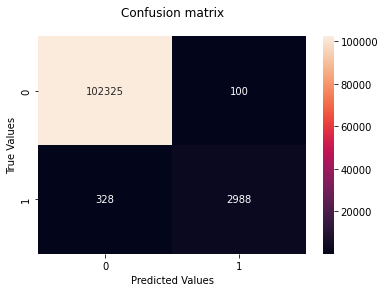

In [ ]:
#Tuesday This is a good one. Keeping this
print_metrics(file_path=binary_all_feats5,
              title="Binary Classification with all features and similarity=5",
              classes=binary_classes)

Binary Classification all features 

Accuracy on testing data                	0.9958 
F1-score weighted on testing data       	0.9952 
F1-score micro on testing data          	0.9953 

Classification Report

   precision    recall  f1-score   support
0   0.995942  0.999248  0.997592  102425.0
1   0.974126  0.874246  0.921488    3316.0


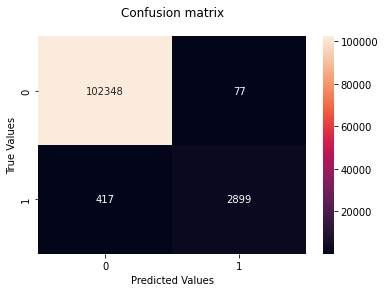

In [ ]:
print_metrics(file_path=binary_all_feats0,
              title="Binary Classification all features",
              classes=binary_classes)

Binary Classification with binary features and sim 5 

Accuracy on testing data                	0.9964 
F1-score weighted on testing data       	0.9961 
F1-score micro on testing data          	0.9962 

Classification Report

   precision    recall  f1-score   support
0   0.997144  0.998916  0.998030  102425.0
1   0.964582  0.911641  0.937364    3316.0


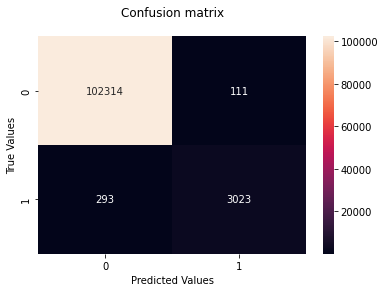

In [ ]:
#Using Binary features
print_metrics(file_path=binaryclass_binary_features_5,
              title="Binary Classification with binary features and sim 5",
              classes=binary_classes)

# Performance Metrics for Multiclass Classification

Multiclass Classification using all features - baseline at 200 

Accuracy on testing data                	0.9899 
F1-score weighted on testing data       	0.9884 
F1-score micro on testing data          	0.9897 

Classification Report

   precision    recall  f1-score   support
0   0.000000  0.000000  0.000000      74.0
1   0.000000  0.000000  0.000000      76.0
2   0.434783  0.051020  0.091324     196.0
3   0.531412  0.922978  0.674484     779.0
4   0.723596  0.437500  0.545301     736.0
5   0.977498  0.936207  0.956407    1160.0
6   0.972093  0.788679  0.870833     265.0
7   0.631579  0.461538  0.533333      26.0
8   0.000000  0.000000  0.000000       4.0
9   0.997241  0.998701  0.997971  102425.0


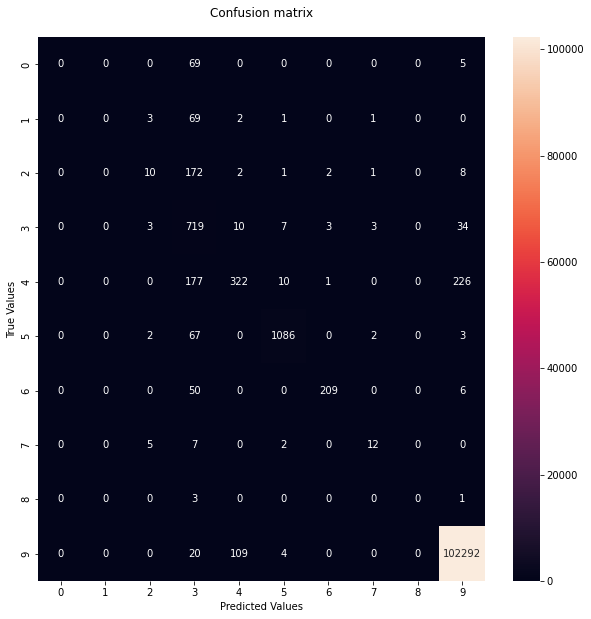

In [ ]:
print_metrics(file_path=all_multiclass_baseline_200epochs,
              title="Multiclass Classification using all features - baseline at 200",
              classes=multi_classes)

Multiclass Classification using all features and sim3 

Accuracy on testing data                	0.9901 
F1-score weighted on testing data       	0.9893 
F1-score micro on testing data          	0.9899 

Classification Report

   precision    recall  f1-score   support
0   0.000000  0.000000  0.000000      74.0
1   1.000000  0.026316  0.051282      76.0
2   0.531250  0.086735  0.149123     196.0
3   0.688889  0.716303  0.702329     779.0
4   0.496021  0.762228  0.600964     736.0
5   0.984574  0.935345  0.959328    1160.0
6   0.972093  0.788679  0.870833     265.0
7   0.571429  0.615385  0.592593      26.0
8   0.000000  0.000000  0.000000       4.0
9   0.998047  0.998008  0.998028  102425.0


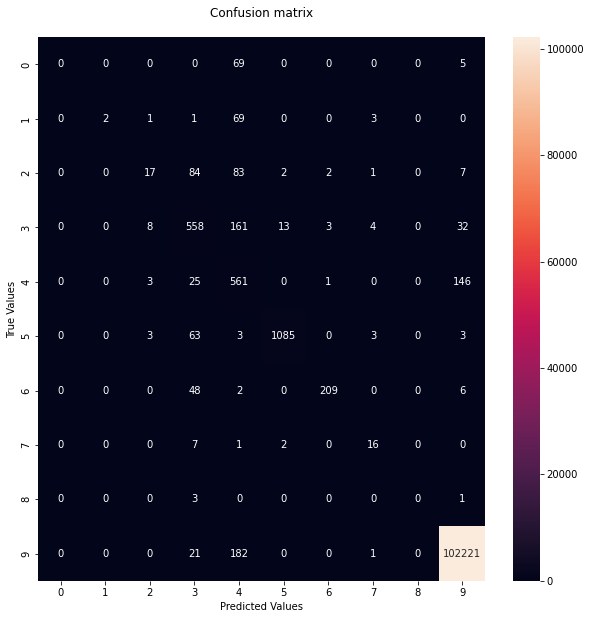

In [ ]:
print_metrics(file_path=all_multiclass_baseline_sim3_200epochs,
              title="Multiclass Classification using all features and sim3",
              classes=multi_classes)

Multiclass Classification using multi features and sim3 

Accuracy on testing data                	0.9902 
F1-score weighted on testing data       	0.9888 
F1-score micro on testing data          	0.9899 

Classification Report

   precision    recall  f1-score   support
0   0.000000  0.000000  0.000000      74.0
1   1.000000  0.026316  0.051282      76.0
2   0.428571  0.076531  0.129870     196.0
3   0.533532  0.919127  0.675153     779.0
4   0.734066  0.453804  0.560873     736.0
5   0.992667  0.933621  0.962239    1160.0
6   0.972093  0.788679  0.870833     265.0
7   0.666667  0.615385  0.640000      26.0
8   0.000000  0.000000  0.000000       4.0
9   0.997290  0.998770  0.998029  102425.0


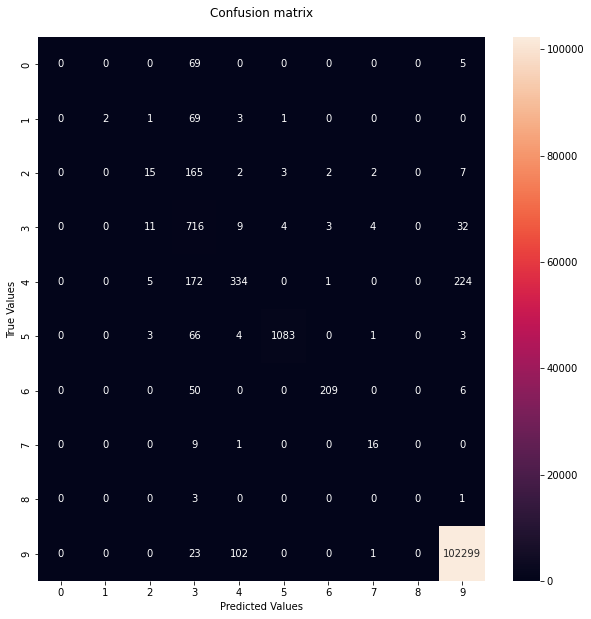

In [ ]:
#Using Multi features with sim3
print_metrics(file_path=multiclass_baseline_sim3,
              title="Multiclass Classification using multi features and sim3",
              classes=multi_classes)

Multiclass Classification using all features - baseline at 200 and focal 2 

Accuracy on testing data                	0.9900 
F1-score weighted on testing data       	0.9874 
F1-score micro on testing data          	0.9886 

Classification Report

   precision    recall  f1-score   support
0   0.000000  0.000000  0.000000      74.0
1   0.500000  0.026316  0.050000      76.0
2   0.400000  0.061224  0.106195     196.0
3   0.641111  0.740693  0.687314     779.0
4   0.416435  0.406250  0.411279     736.0
5   0.990842  0.932759  0.960924    1160.0
6   0.981221  0.788679  0.874477     265.0
7   0.354839  0.846154  0.500000      26.0
8   0.000000  0.000000  0.000000       4.0
9   0.996223  0.999112  0.997665  102425.0


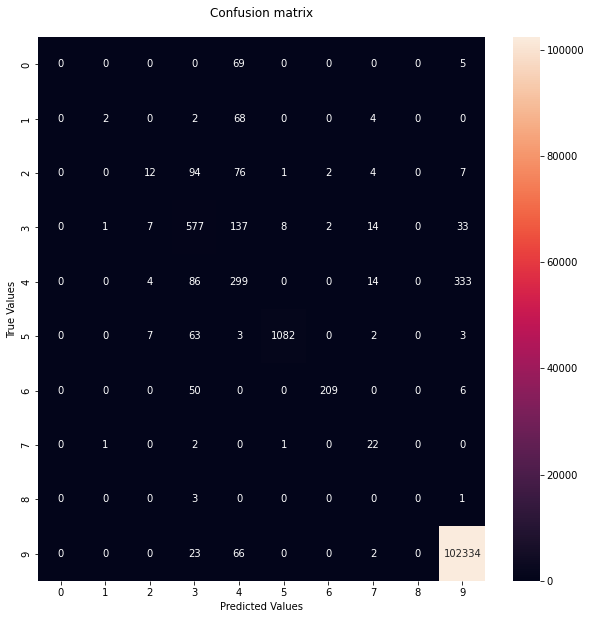

In [ ]:
#For Multi with focal loss
print_metrics(file_path=multiclass_baseline_sim3_f2,
              title="Multiclass Classification using all features - baseline at 200 and focal 2",
              classes=multi_classes)

Multiclass Classification using all features - baseline at 200 and focal 3 

Accuracy on testing data                	0.9901 
F1-score weighted on testing data       	0.9885 
F1-score micro on testing data          	0.9887 

Classification Report

   precision    recall  f1-score   support
0   0.000000  0.000000  0.000000      74.0
1   0.000000  0.000000  0.000000      76.0
2   0.583333  0.035714  0.067308     196.0
3   0.681818  0.731707  0.705882     779.0
4   0.448326  0.836957  0.583886     736.0
5   0.997243  0.935345  0.965302    1160.0
6   0.894515  0.800000  0.844622     265.0
7   0.789474  0.576923  0.666667      26.0
8   0.000000  0.000000  0.000000       4.0
9   0.998718  0.996280  0.997498  102425.0


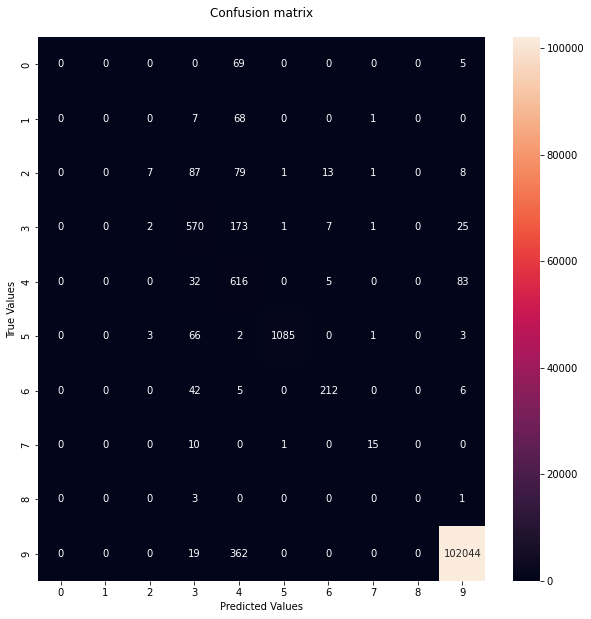

In [ ]:
#For Multi with focal loss
print_metrics(file_path=multiclass_baseline_sim3_f3,
              title="Multiclass Classification using all features - baseline at 200 and focal 3",
              classes=multi_classes)

Multiclass Classification using all features - baseline at 200 and focal 4 

Accuracy on testing data                	0.9900 
F1-score weighted on testing data       	0.9880 
F1-score micro on testing data          	0.9891 

Classification Report

   precision    recall  f1-score   support
0   0.000000  0.000000  0.000000      74.0
1   0.750000  0.039474  0.075000      76.0
2   0.555556  0.051020  0.093458     196.0
3   0.687032  0.707317  0.697027     779.0
4   0.472222  0.554348  0.510000     736.0
5   0.992694  0.937069  0.964080    1160.0
6   0.836000  0.788679  0.811650     265.0
7   0.485714  0.653846  0.557377      26.0
8   0.000000  0.000000  0.000000       4.0
9   0.996426  0.998838  0.997630  102425.0


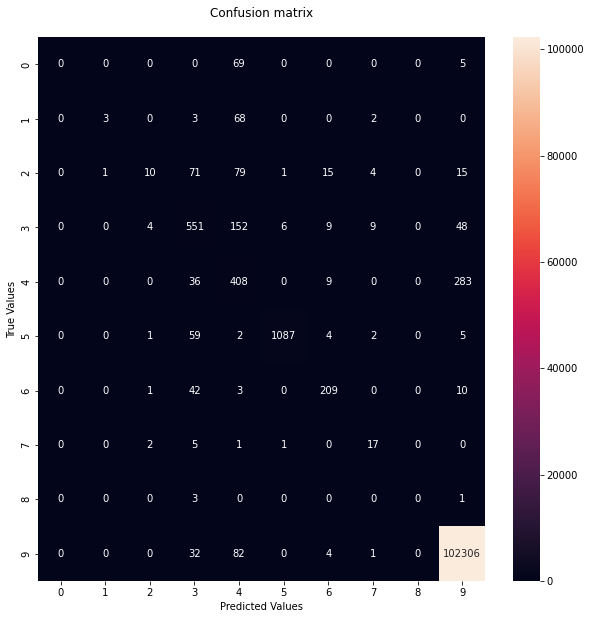

In [ ]:
#For Multi with focal loss
print_metrics(file_path=multiclass_baseline_sim3_f4,
              title="Multiclass Classification using all features - baseline at 200 and focal 4",
              classes=multi_classes)

Multiclass Classification using all features - baseline at 200 and focal 1 

Accuracy on testing data                	0.9900 
F1-score weighted on testing data       	0.9887 
F1-score micro on testing data          	0.9898 

Classification Report

   precision    recall  f1-score   support
0   0.000000  0.000000  0.000000      74.0
1   0.125000  0.013158  0.023810      76.0
2   0.440000  0.056122  0.099548     196.0
3   0.535849  0.911425  0.674905     779.0
4   0.721414  0.471467  0.570255     736.0
5   0.990859  0.934483  0.961846    1160.0
6   0.967593  0.788679  0.869023     265.0
7   0.566667  0.653846  0.607143      26.0
8   0.000000  0.000000  0.000000       4.0
9   0.997328  0.998662  0.997995  102425.0


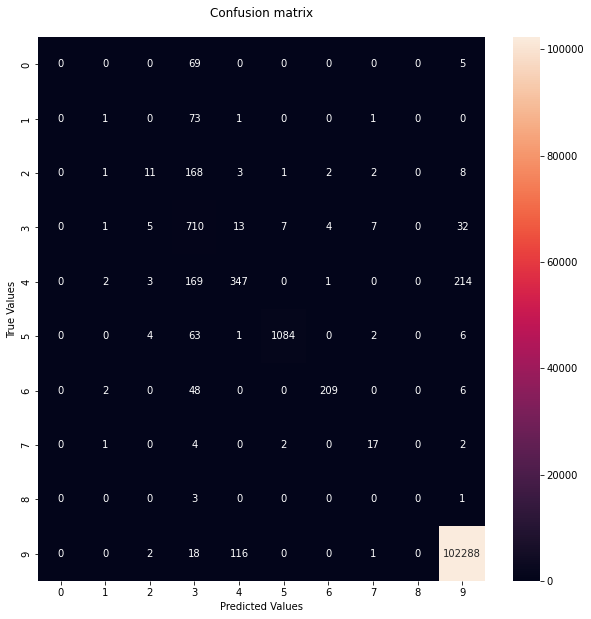

In [ ]:
#For Multi with focal loss
print_metrics(file_path=multiclass_baseline_sim3_f1,
              title="Multiclass Classification using all features - baseline at 200 and focal 1",
              classes=multi_classes)

Multiclass Classification using all features - baseline at 200 and focal 5 

Accuracy on testing data                	0.9897 
F1-score weighted on testing data       	0.9752 
F1-score micro on testing data          	0.9775 

Classification Report

   precision    recall  f1-score   support
0   0.000000  0.000000  0.000000      74.0
1   0.333333  0.026316  0.048780      76.0
2   0.250000  0.020408  0.037736     196.0
3   0.294553  0.715019  0.417228     779.0
4   0.429352  0.854620  0.571558     736.0
5   0.857143  0.010345  0.020443    1160.0
6   0.731707  0.792453  0.760870     265.0
7   0.379310  0.423077  0.400000      26.0
8   0.000000  0.000000  0.000000       4.0
9   0.999020  0.995196  0.997105  102425.0


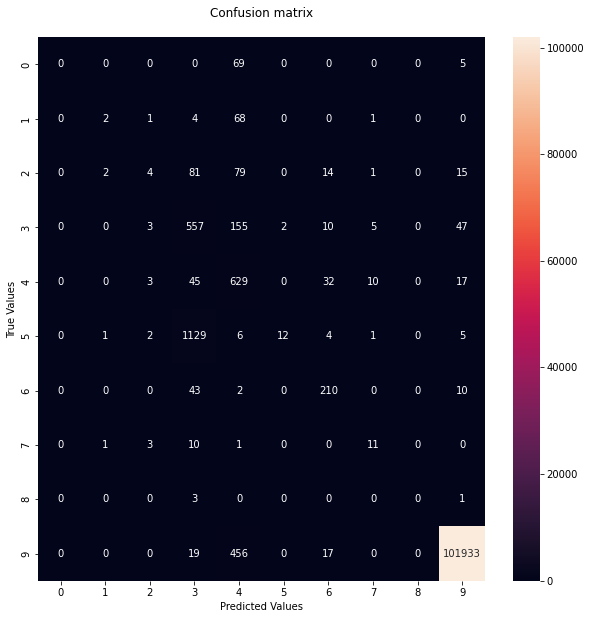

In [ ]:
#For Multi with focal loss
print_metrics(file_path=multiclass_baseline_sim3_f5,
              title="Multiclass Classification using all features - baseline at 200 and focal 5",
              classes=multi_classes)